# Hypothesis: 

## Is there a significant number of accidents in rural areas caused by or involving drivers who do not live in the vicinity?

## Packages
Importing all necessary packages to run the notebook

In [18]:
# data handling and manipulation
from pathlib import Path
import pandas as pd

# visualisation
from textwrap import wrap
#from mpl_toolkits.basemap import Basemap

## Directory navigation and creation
Creating pathlib.Path objects for cross-platform navigation and loading the three datasets into pandas DataFrame objects

**Note:** here we import the cleaned accidents.pkl file

In [7]:
# creating Path object for current working directory
cwd = Path('./')
root = cwd.resolve().parent
# creating Path object for additional data directory
additional_data_dir = root / 'additional_data'
# create new directory for additional data
Path(additional_data_dir).mkdir(exist_ok=True)

# creating Path object for plots directroy
plots_dir = root / 'plots'
# create new directory for plots
Path(plots_dir).mkdir(exist_ok=True)

# defining the directory to original data
data_dir = root / 'data'
additional_directory = root / 'additional_data'

# list the .csv files for the project
for file in data_dir.glob('*.csv'):
    print(file)
    
# reading in .csv files to dataframes
vehicles = pd.read_csv(data_dir / 'vehicles2019.csv', dtype={'Accident_Index': str})
casualties = pd.read_csv(data_dir / 'casualties2019.csv', dtype={'Accident_Index': str})
# cleaned accidents DataFrame
accidents = pd.read_pickle(additional_data_dir / 'accidents_cleaned.pkl')

# convert column names to lowercase for ease of indexing
def lower_columns(df):
    """
    Defintion:
        convert column names to lower case
    """
    df.columns = map(str.lower, df.columns)
    
# converting all column names to lower case
lower_columns(vehicles)
lower_columns(casualties)

accidents.head(5)

/Volumes/GoogleDrive/My Drive/Dev/TrafficAccidents/data/accidents2019.csv
/Volumes/GoogleDrive/My Drive/Dev/TrafficAccidents/data/casualties2019.csv
/Volumes/GoogleDrive/My Drive/Dev/TrafficAccidents/data/vehicles2019.csv


,accident_index,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_(district),local_authority_(highway),...,lsoa_of_accident_location,district,converted_date,converted_time,sunrise,sunset,day_length,datetime,decimal_time,day_of_year
0,2019010128300,-0.153842,51.508057,1,3,2,3,2,1,E09000033,...,E01004762,westminster,2019-02-18,17:50:00,0 days 07:10:00,0 days 17:19:00,10:09:00,2019-02-18 17:50:00,17.833333,49
1,2019010164251,-0.141154,51.502191,1,3,1,2,2,1,E09000033,...,E01004736,westminster,2019-02-18,18:50:00,0 days 07:10:00,0 days 17:19:00,10:09:00,2019-02-18 18:50:00,18.833333,49
2,2019010164259,-0.174097,51.527663,1,3,2,1,2,1,E09000033,...,E01004728,westminster,2019-02-18,23:00:00,0 days 07:10:00,0 days 17:19:00,10:09:00,2019-02-18 23:00:00,23.000000,49
3,2019010164414,-0.163973,51.515931,1,3,2,1,2,1,E09000033,...,E01004658,westminster,2019-02-18,02:00:00,0 days 07:10:00,0 days 17:19:00,10:09:00,2019-02-18 02:00:00,2.000000,49
4,2019010164107,-0.103521,51.464277,1,3,1,1,2,9,E09000022,...,E01003051,lambeth,2019-02-18,08:00:00,0 days 07:10:00,0 days 17:19:00,10:09:00,2019-02-18 08:00:00,8.000000,49


In [8]:
# merging all three dataframes
avc = pd.merge(accidents, vehicles, on='accident_index')
avc = pd.merge(avc, casualties)

# filtering for useful information
avc = avc.filter(['accident_index', 'latitude', 'longitude',
                  'urban_or_rural_area', 'casualty_home_area_type',
                  'casualty_type', 'accident_severity'])



# filtering for accidents in rural locations
rural_accidents = avc[avc.urban_or_rural_area == 2]

print(rural_accidents.shape)

rural_accidents.head(5)

(55135, 7)


,accident_index,latitude,longitude,urban_or_rural_area,casualty_home_area_type,casualty_type,accident_severity
46,2019010164088,51.429955,-0.401679,2,1,1,3
65,2019010164202,51.686241,-0.143477,2,1,9,3
77,2019010171036,51.394073,-0.314370,2,1,9,3
78,2019010171036,51.394073,-0.314370,2,1,9,3
79,2019010171036,51.394073,-0.314370,2,1,9,3


In [9]:
# filtering for drivers who do not live in rural areas
urban_drivers = rural_accidents[rural_accidents.casualty_home_area_type != 3]

urban_accidents = avc.filter(['accident_index', 'latitude', 'longitude',
                  'urban_or_rural_area', 'casualty_home_area_type',
                  'casualty_type', 'accident_severity'])[avc.urban_or_rural_area == 1]

In [10]:
urban_drivers

,accident_index,latitude,longitude,urban_or_rural_area,casualty_home_area_type,casualty_type,accident_severity
46,2019010164088,51.429955,-0.401679,2,1,1,3
65,2019010164202,51.686241,-0.143477,2,1,9,3
77,2019010171036,51.394073,-0.314370,2,1,9,3
78,2019010171036,51.394073,-0.314370,2,1,9,3
79,2019010171036,51.394073,-0.314370,2,1,9,3
...,...,...,...,...,...,...,...
153150,201997QC00604,55.726336,-3.795066,2,1,9,3
153154,201997UC70504,55.598065,-4.475261,2,1,0,2
153155,201997LB01404,56.447176,-4.752047,2,1,9,1
153156,201997LB01604,55.612186,-5.682037,2,-1,1,3


### Visualisations

Creating a visualisation for the accidents location in rural areas but caused by people who do not live in those areas.

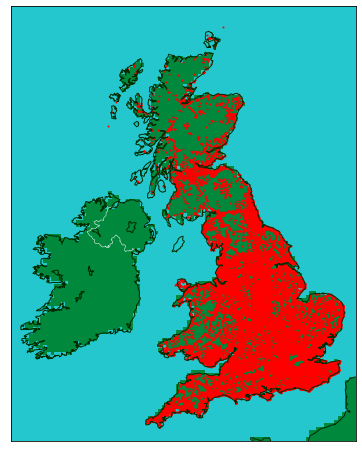

In [53]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(llcrnrlon=-10.5,llcrnrlat=49.5,urcrnrlon=3.5,urcrnrlat=59.5,
            resolution='i',projection='tmerc',lon_0=-4.36,lat_0=54.7)
m.drawcoastlines(color='#012C00')
m.drawcountries(color='white')
m.drawlsmask(land_color='#00883D', ocean_color='#23C7CD',lakes=True)

m.scatter(urban_drivers.longitude, urban_drivers.latitude,
          latlon=True,
          alpha=1,
          s=1,
          marker='o',
          color='red')


fig.savefig(plots_dir / 'rural_accidents')

Creating a visualisation for the accidents location in urban areas

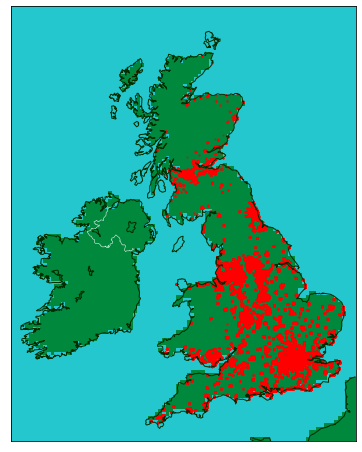

In [54]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(llcrnrlon=-10.5,llcrnrlat=49.5,urcrnrlon=3.5,urcrnrlat=59.5,
            resolution='i',projection='tmerc',lon_0=-4.36,lat_0=54.7)
m.drawcoastlines(color='#012C00')
m.drawcountries(color='white')
m.drawlsmask(land_color='#00883D', ocean_color='#23C7CD',lakes=True)

m.scatter(urban_accidents.longitude, urban_accidents.latitude,
          latlon=True,
          alpha=1,
          s=1,
          marker='o',
          color='red')


fig.savefig(plots_dir / 'urban_accidents')

In [11]:
urban_drivers.head(5)

,accident_index,latitude,longitude,urban_or_rural_area,casualty_home_area_type,casualty_type,accident_severity
46,2019010164088,51.429955,-0.401679,2,1,1,3
65,2019010164202,51.686241,-0.143477,2,1,9,3
77,2019010171036,51.394073,-0.314370,2,1,9,3
78,2019010171036,51.394073,-0.314370,2,1,9,3
79,2019010171036,51.394073,-0.314370,2,1,9,3


## Determining summary stats

In [19]:
# determing the percentage of rural accidents by casualty vehicle type
percent_rural = (urban_drivers.casualty_type.value_counts() / urban_drivers.shape[0])
# determining the percentage of all accidents by casualty vehicle type
percent_all = (avc.casualty_type.value_counts() / avc.shape[0])

# taking the ratio
ratios = (percent_rural / percent_all).to_frame()
ratios = ratios.drop([-1, 18], axis=0)

# importing .csv from the variable_lookup spreadsheet for better
# feature names
casualty_types = pd.read_csv(additional_data_dir / 'casualty_type.csv')
casualty_types = casualty_types.merge(ratios, left_index=True, right_index=True)
casualty_types['label'] = ['\n'.join(wrap(l, 15)) for l in casualty_types['label']]

casualty_types

,code,label,casualty_type
0,0,Pedestrian,0.298714
1,1,Cyclist,0.480521
2,2,Motorcycle 50cc\nand under rider\nor passenger,0.559787
3,3,Motorcycle\n125cc and under\nrider or\npassenger,0.565758
4,4,Motorcycle over\n125cc and up to\n500cc rider ...,0.809691
5,5,Motorcycle over\n500cc rider or\npassenger,1.486517
8,10,Minibus (8 - 16\npassenger\nseats) occupant,0.432155
9,11,Bus or coach\noccupant (17 or\nmore pass\nseats),1.285544
10,16,Horse rider,1.558498
11,17,Agricultural\nvehicle\noccupant,0.472315


## Creating visualisation of ratios

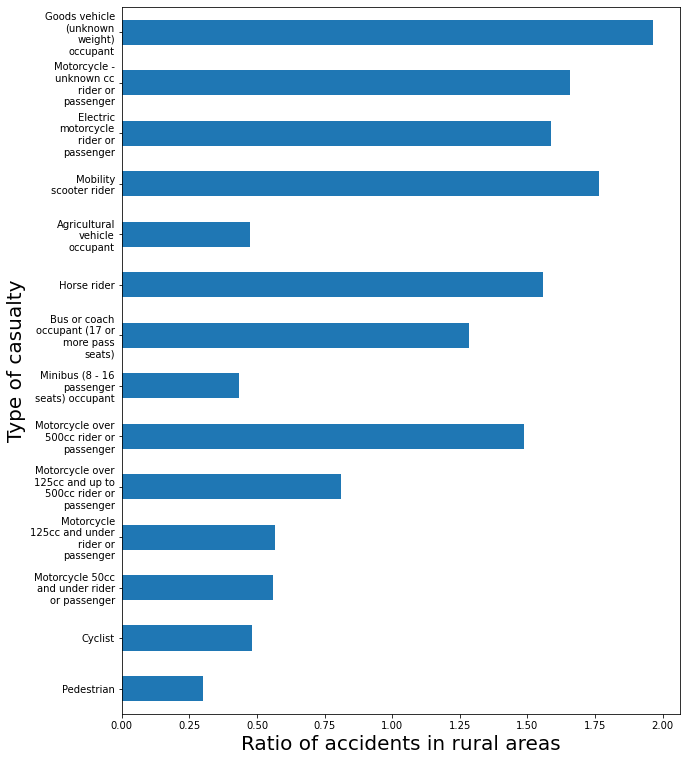

In [42]:
casualty_plot = casualty_types.plot.barh(x='label', y='casualty_type', figsize=(10, 13))
casualty_plot.set_xlabel("Ratio of accidents in rural areas", fontsize=20)
casualty_plot.set_ylabel("Type of casualty", fontsize=20)
casualty_plot.get_legend().remove()

casualty_plot.figure.savefig(plots_dir / 'casualty_rural')